Questo è un tentativo di fare un algoritmo per calcolare la matrice di Wasserstein tra due funzioni $f, g: \mathbb R^2 \to \mathbb R$ a supporto compatto.

Senza perdita di generalità si può assumere che
$$ f(x,y) > 0 \texttt{ or } g(x, y) > 0 \,\Longrightarrow 0\, \leq x \leq 1 \texttt{ and } 0 \leq y \leq 1 \,\Longrightarrow 0\, f(x,y) \geq 0 \texttt{ or } g(x, y) \geq 0$$
e che
$$ \int_0^1 \int_0^1 f(x,y) dx dy = \int_0^1 \int_0^1 g(x,y) dx dy = 1 $$
perché se necessario la funzione si può traslare e scalare.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import interpolate

N = 20

def ccf(x, y, cx, cy):
     return (x - cx)**2 + (y - cy)**2

def random_2d_sampler(xx, yy):
    zs = np.array([ ccf(xx, yy, random.random(), random.random()) for i in range(9) ])
    return np.amin(zs, axis=0)

x = y = np.linspace(0, 1, N, endpoint=False)
xx, yy = np.meshgrid(x, y)

f_samples = random_2d_sampler(xx, yy)
f_samples /= sum(sum(f_samples))
g_samples = random_2d_sampler(xx, yy)
g_samples /= sum(sum(g_samples))


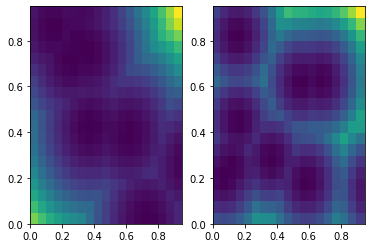

In [2]:
plt.subplot(1,2,1)
plt.pcolormesh(x, y, f_samples)

plt.subplot(1,2,2)
plt.pcolormesh(x, y, g_samples)

In [3]:
f = interpolate.interp2d(x, y, f_samples, kind='cubic')
g = interpolate.interp2d(x, y, g_samples, kind='cubic')

In [4]:
indi_joint = np.empty((N,N,N,N))

In [5]:
for i in range(N):
    for j in range(N):
         for h in range(N):
                for k in range(N):
                    indi_joint[i,j,h,k] = f(i/N,j/N) * g(h/N, k/N)

In [6]:
from math import floor
def intermediate(joint, i, j, h, k, t):
    wi = floor(i + t*(h-i))
    wj = floor(j + t*(k-j))
    return (wi, wj, joint[i,j,h,k])

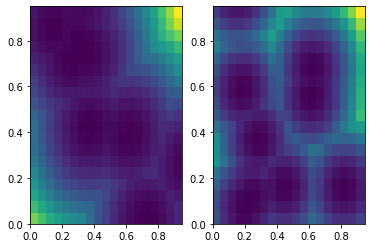

In [9]:
from IPython.display import clear_output
for t in range(0,11):
    int_samples = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
             for h in range(N):
                    for k in range(N):
                        wi, wj, weight = intermediate(indi_joint,i,j,h,k,t/10)
                        int_samples[wi,wj] += weight
    clear_output()
    plt.subplot(1,2,1)
    plt.pcolormesh(x, y, f_samples)
    plt.subplot(1,2,2)
    plt.pcolormesh(x, y, int_samples)
    plt.show()